In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# S_0 = [1e-49, 9e-46, 3.24e-46]
# f_0 = [215, 150, 500]
# f_s = [20, 40, 20]

detectors = [
    {
        "name": "Adv. LIGO",
        "S_0": 1e-49,
        "f_0": 215,
        "f_s": 20
    },
    {
        "name": "Ini. LIGO",
        "S_0": 9e-46,
        "f_0": 150,
        "f_s": 40
    },
    {
        "name": "VIRGO",
        "S_0": 3.24e-46,
        "f_0": 500,
        "f_s": 20
    }
]

def S_hA(f): # Advanced LIGO PSD
    S_0 = detectors[0]["S_0"]
    f_0 = detectors[0]["f_0"]
    f_s = detectors[0]["f_s"]
    
    x = lambda f: f/f_0
    
    if f >= f_s:
        return S_0 * (x(f)**(-4.14) - 5*x(f)**(-2) + 111 * (1 - x(f)**2 + x(f)**4/2 )/(1 + x(f)**2/2) )
    else:
        return np.inf

def S_hI(f): # Initial LIGO PSD
    S_0 = detectors[1]["S_0"]
    f_0 = detectors[1]["f_0"]
    f_s = detectors[1]["f_s"]
    
    x = lambda f: f/f_0
    
    if f >= f_s:
        return S_0 * ((4.49 * x(f))**(-56) + 0.16 * x(f)**(-4.52) + 0.52 + 0.32 * x(f)**2)
    else:
        return np.inf
    
def S_hV(f): # VIRGO PSD
    S_0 = detectors[2]["S_0"]
    f_0 = detectors[2]["f_0"]
    f_s = detectors[2]["f_s"]
    
    x = lambda f: f/f_0
    
    if f >= f_s:
        return S_0 * ((6.23 * x(f))**(-5) + 2 * x(f)**(-1) + 1 + x(f)**2)
    else:
        return np.inf
    
detectors[0]["fn"] = S_hA
detectors[1]["fn"] = S_hI
detectors[2]["fn"] = S_hV

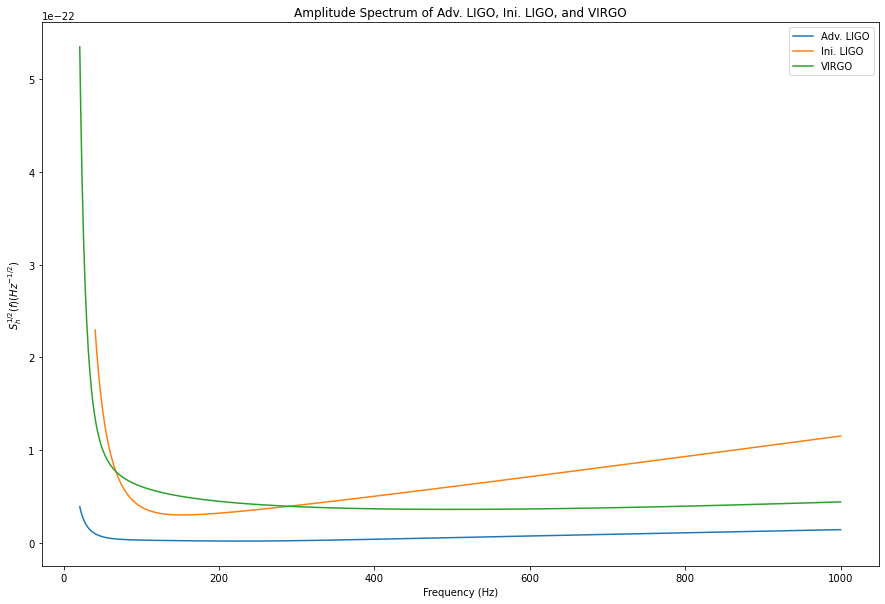

In [78]:
def amp(f, fn):
    return np.sqrt(fn(f))
    
arr = np.linspace(10, 1000, 1000)

for detector in detectors:
    name, fn = detector["name"], detector["fn"]
    plt.plot(arr, np.vectorize(amp)(arr, fn), label=name)

plt.rcParams['figure.figsize'] = [15, 10]

plt.title("Amplitude Spectrum of Adv. LIGO, Ini. LIGO, and VIRGO")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$S_h^{1/2}(f) (Hz^{-1/2})$")
plt.legend()
plt.show()

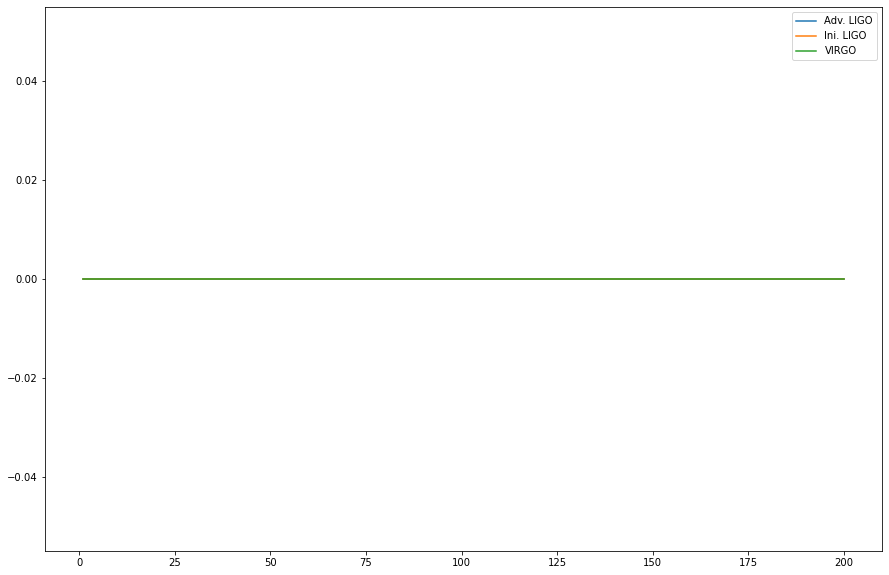

In [88]:
import scipy.integrate as integrate

roh_0 = 5 # SNR

def D(M, detector, eta = 1/4):
    f_lso = (6**(3/2) * np.pi * M)**(-1)
    
    # print(f_lso) This is much lesser than f_s -> causing S_h to blow up
    return (1/(roh_0 * np.pi**(2/3))) * np.sqrt((2 * eta * M**(5/3))/15) * \
    np.sqrt(integrate.quad(lambda f: f**(-7/3)/detector["fn"](f), detector["f_s"], f_lso)[0])

masses = np.linspace(1, 200, 1000)

for detector in detectors:
    name = detector["name"]
    
    dist = np.array([D(m, detector) for m in masses])
    dist /= (1e+6 * 3.26 * 9.46e+15)
    
    plt.plot(M, dist, label=name)
    
plt.legend()
plt.show()